In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import math
import sys
import gc

C:\Users\cdipt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Writing our own distribution function
<dev> As we discussed in the report that we need to have a Gaussian distribution function super-imposed with a log(uniform) distribution for better sampling efficiency. We have implemented the function below</dev>

In [3]:
def unified(vmax,size=100000,percentage_peak=0.1, tolerance_factor=1.1):
    """
    vmax: The maximum expected absolute velocity of the system.
    percentage_peak: The percentage of the samples to be sampled from the log(uniform) distribution
    size: The total size of the distribution
    """
    assert percentage_peak<=1, "percentage_peak must be less than 1"
    centre_width = int(size*percentage_peak)
    centre = np.log(abs(1/(np.random.uniform(low = -1, high =1, size = centre_width))))*np.random.choice(a =[-1,1],size = centre_width)
    gaussian_width = int((1-percentage_peak)*size)
    spread = np.random.normal(loc = 0, scale = (vmax/2), size = gaussian_width)
    final = np.concatenate([centre,spread])
    final = final[np.abs(final)<= vmax*tolerance_factor]
    return final

## Our Step Function
<div> This function below returns the next step stochastically when provided with the previous step.</div>

In [5]:
def step(x_last,v_last,v_max,m,k,eps = 0.0001,sample=10000000,dt=0.01,Max_iter=10,discount_factor=1.1):
    """
    step: This function returns the values for the next step when provided with the previous one
    args:
    x_last: The previous value of the position
    v_last: The previous value of the velocity
    m: The mass of the object
    k: The stiffness of the string
    eps: The precision factor
    sample: The number of samples to sample in each iterations
    dt: The simulation step
    Max_iter: After how many consecutive failure should the eps be increased
    discount_factor: The amount by which the eps is increased
    
    """

    i = 0
    while(True):
        i = i +1
        v_generated = unified(abs(v_max),size=sample)
        delv = (v_generated-v_last)/dt
        lhs = k*x_last
        rhs = -1*m*delv
        diff = abs((lhs - rhs)/lhs)
        index = None
        v_new = None
        x_new = None
        if i%Max_iter == 0:
            eps = eps*discount_factor
        if diff.min()<eps:
            index = diff.argmin()
            v_new = v_generated[index]
            x_new = x_last +dt*v_new
            return x_new, v_new
        else:
            continue
        
                    

In [6]:
t_ini = 0
t_final = math.pi*2
dt = 0.01
steps = int((t_final-t_ini)/dt) +1
t = [0]
x = [1]
v = [0]
m = 2
k = 20
w = math.sqrt(k/m)
v_max = math.sqrt( (k/m)*(x[0]**2) + v[0]**2)
# steps =10
print(v_max)
x_real =[1]
v_real = [0]
for i in tqdm(range(steps)):
    x_g,v_g = step(x[-1],v[-1],v_max,m,k)
    t.append(i*dt)
    x.append(x_g)
    v.append(v_g)
    x_real.append(math.cos(w*t[-1]))
    v_real.append(-w*math.sin(w*t[-1]))

3.1622776601683795


100%|██████████| 629/629 [04:38<00:00,  2.26it/s]


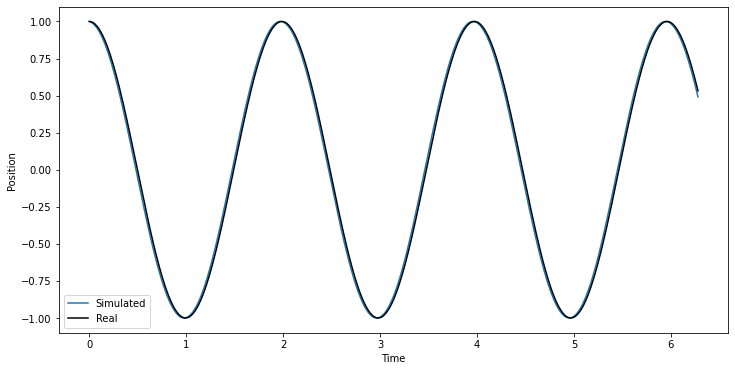

In [14]:
plt.figure(figsize=(12,6))
plt.plot(t,x, label = "Simulated")
plt.plot(t,x_real, c = "Black",label = "Real")
plt.xlabel("Time")
plt.ylabel("Position")
# plt.plot(t,v)
plt.legend()
plt.savefig("Real_Simulated.png")